# Предсказание оттока пользователей

## Исследование

In [129]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [130]:
path = r'E:\Рабочий стол\projects\Machine_learning\Предсказание оттока пользователей'

data = pd.read_csv(path + r'\train.csv')
data_test = pd.read_csv(path + r'\test.csv')

In [131]:
print(data.shape)
data.head()

(5282, 20)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [133]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Как мы видим, TotalSpent не имеет численный тип данных, исправим это.

In [135]:
data['TotalSpent'] = data['TotalSpent'].str.strip(' ')
data['TotalSpent'] = data['TotalSpent'].replace('', np.nan)
data['TotalSpent'] = data['TotalSpent'].astype(np.float64)

Узнаем сколько незаполненных значений в наших данных:

In [136]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [137]:
data.sort_values("TotalSpent").tail(12)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5268,72,117.50,8670.10,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
684,72,118.75,8672.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
5239,72,117.80,8684.80,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),1
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0


Как можно видеть, 9 NaN-ов - это новые клиенты, еще не оплатившие услуги, заполним NaN-ы нулями

In [138]:
data['TotalSpent'].fillna(0., inplace=True)

In [139]:
num_data = data[num_cols]
cat_data = data[cat_cols]

In [140]:
num_data_with_target = pd.concat((data[num_cols], data[target_col]), axis=1)

Посмотрим на распределение в численных признаках:

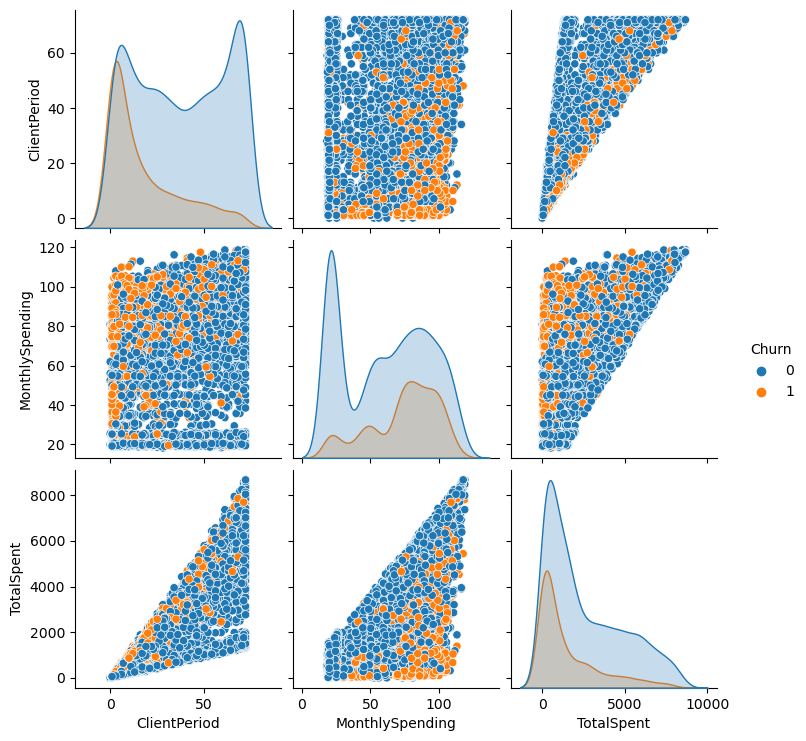

In [141]:
sns.pairplot(num_data_with_target, hue = 'Churn')

Можем видеть, что TotalSpent явно зависит от MonthlySpending и ClientPeriod

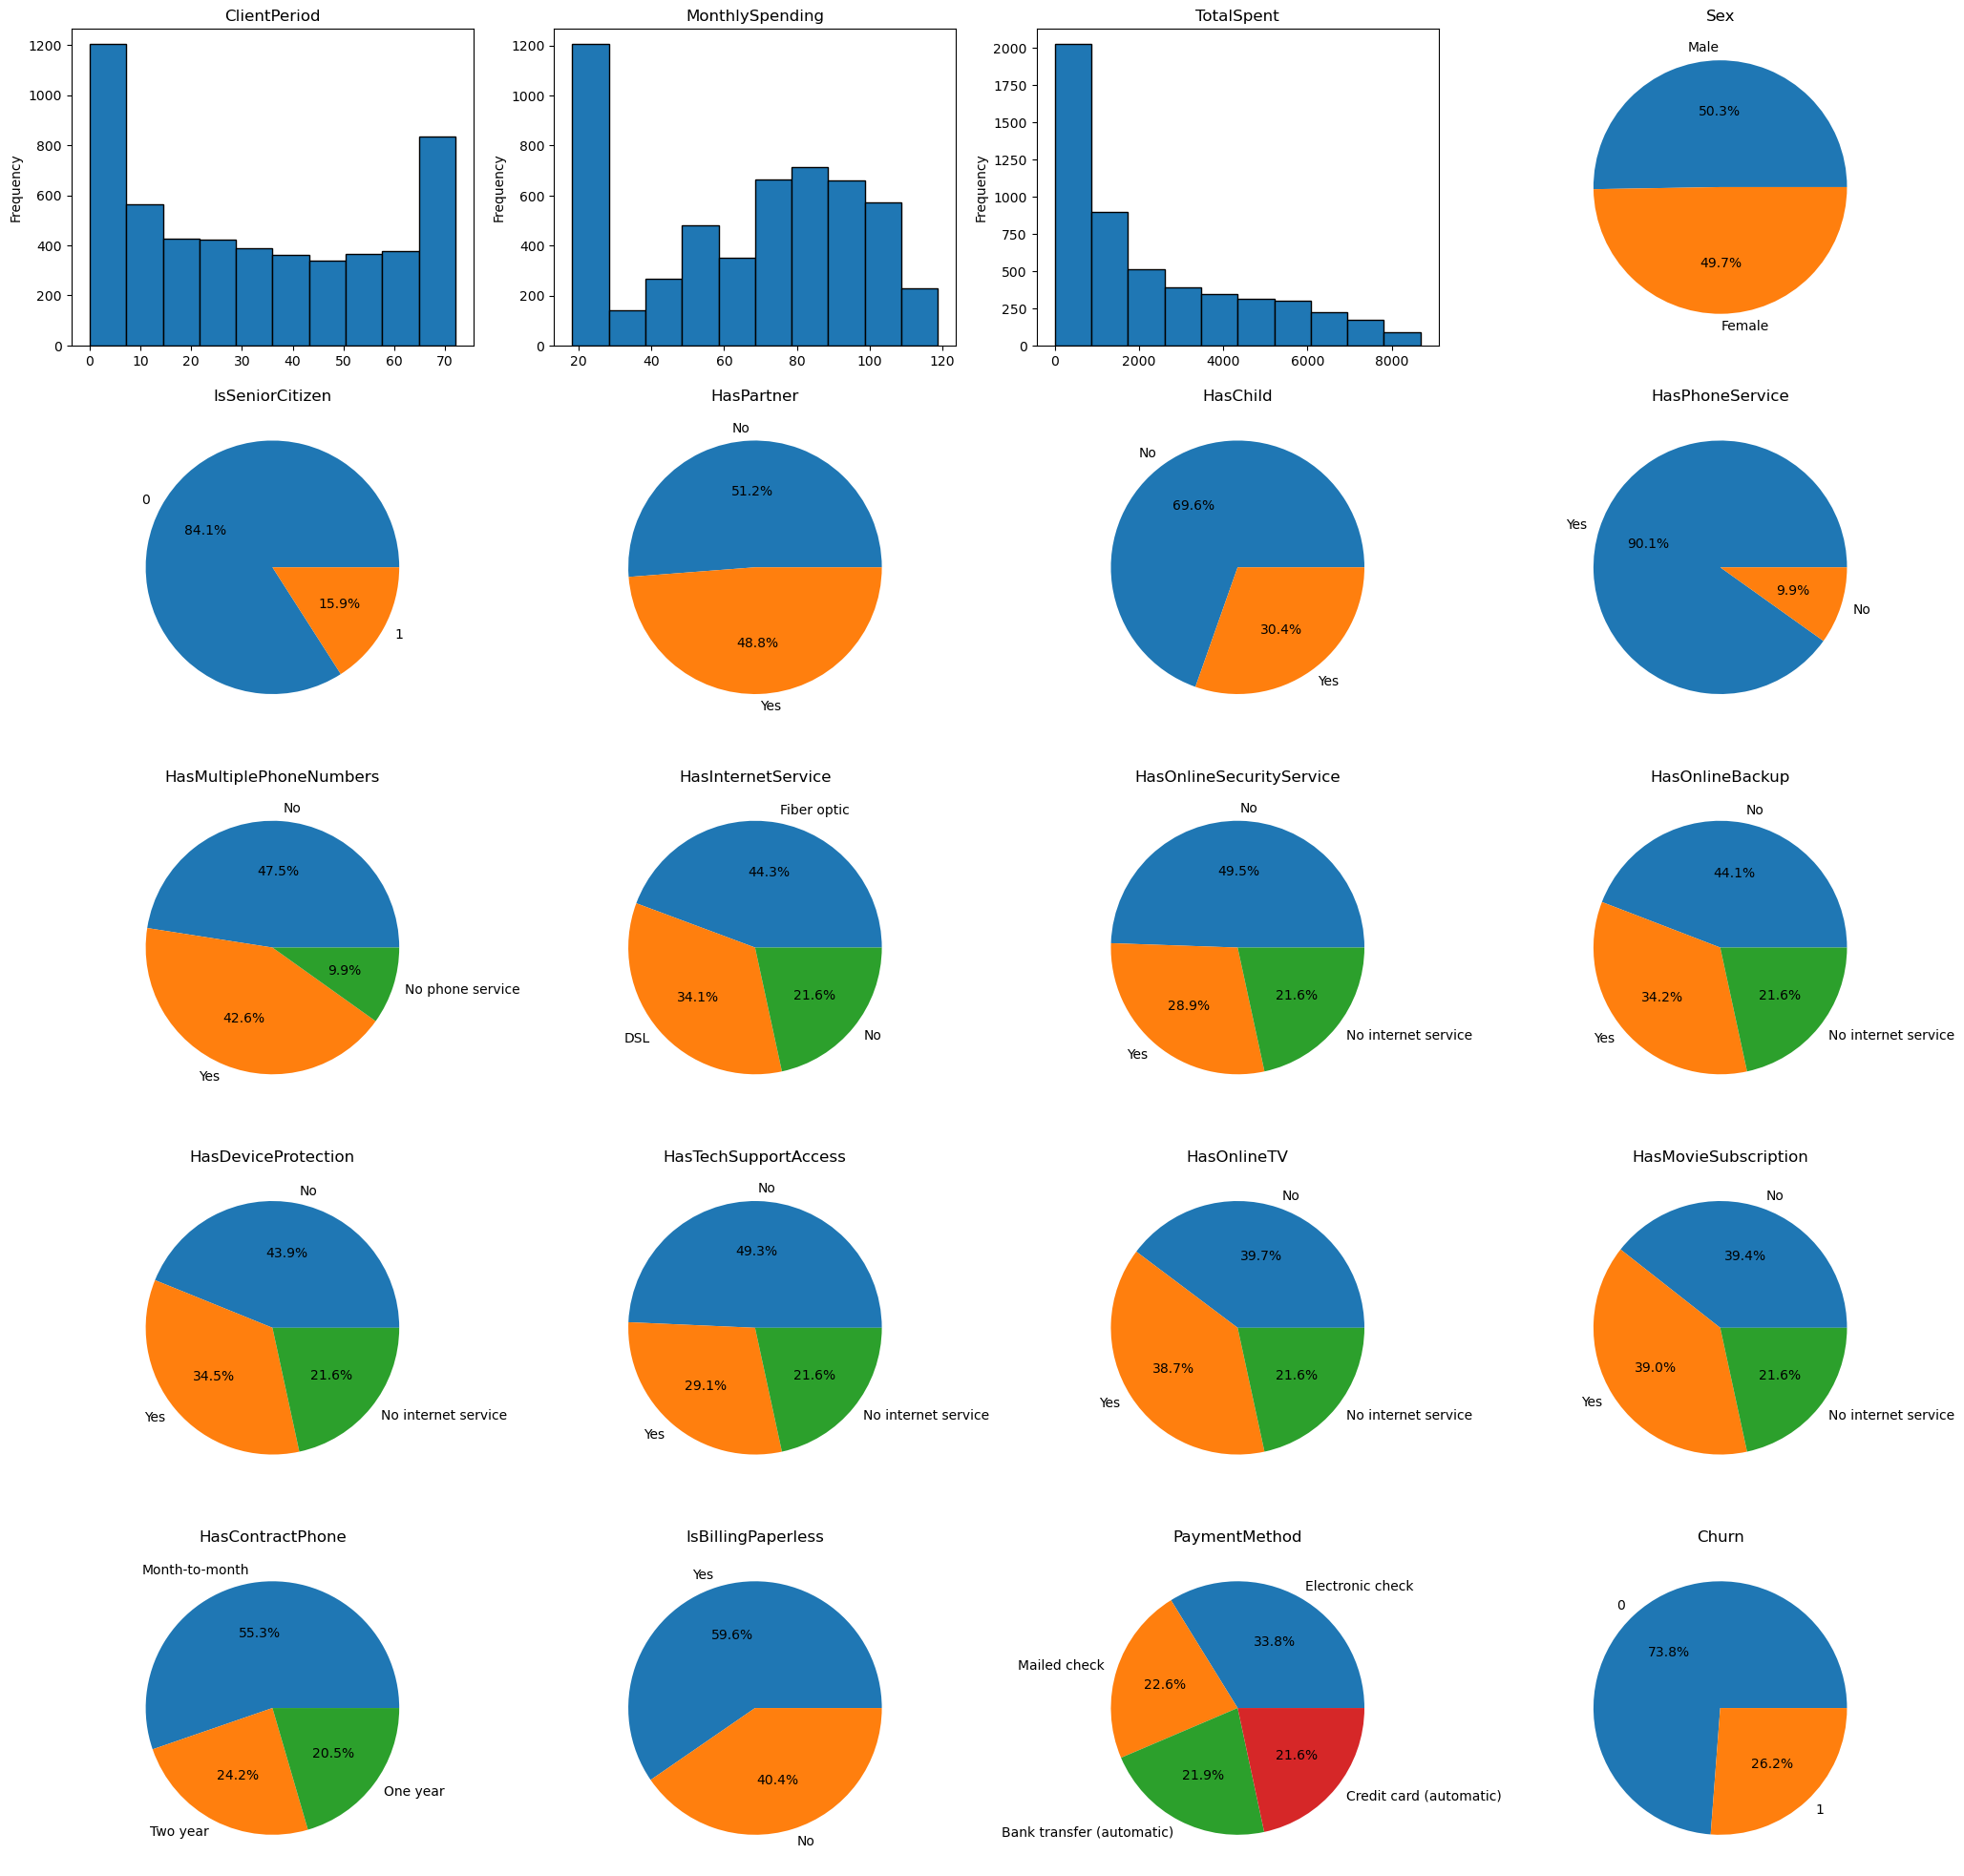

In [142]:
fig, axes = plt.subplots(5, 4, figsize=(25, 25))
for ax, col in zip(axes.flatten(), data.columns):
    ax.set_title(col)
    if col in cat_cols or col == target_col:
        ax.pie(data[col].value_counts(), autopct="%1.1f%%", labels=data[col].value_counts().index)
    else:
        data[col].plot(kind="hist", ec="black", ax=ax)

Можем видеть, что целевая переменная несбалансированная, класса 2, будем использовать метрику roc_auc


## Применим линейные модели

In [143]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [144]:
encoder = OneHotEncoder()
X_cat = encoder.fit_transform(cat_data)
X_cat = X_cat.toarray()
X_cat.shape

(5282, 43)

In [145]:
X_num = data[num_cols].to_numpy()
X = np.concatenate((X_num, X_cat), axis=1)
y = data[target_col].to_numpy()


In [146]:
pipeline = make_pipeline(RobustScaler(),
                        LogisticRegression(random_state=100),
                        )
parameters = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
             }

In [147]:
log_reg = GridSearchCV(estimator=pipeline,
                        param_grid=parameters,
                        cv=5,
                        scoring='roc_auc',
                        n_jobs=-1,
                        verbose=10,)

In [148]:
log_reg.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=100))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001]},
             scoring='roc_auc', verbose=10)

In [149]:
means = CV_model.cv_results_['mean_test_score']
error = CV_model.cv_results_['std_test_score']
print(means.max())

0.8451139293077017


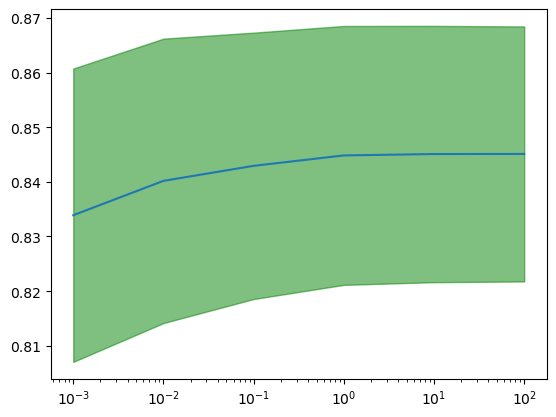

In [150]:
grid = parameters['logisticregression__C']
plt.fill_between(grid, means - 2 * error, means + 2 * error, 
                         color='green', label='filled area between errors', alpha=0.5)

plt.plot(grid, means,)
plt.xscale('log')

## Результат: ROC_AUC= 0.845

## Применим градиентный бустинг

In [151]:
!pip install catboost

In [152]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)


In [154]:
X_train

array([[8.00000e+00, 2.02000e+01, 1.40950e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.50000e+01, 6.60500e+01, 3.46210e+03, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.10000e+01, 2.04500e+01, 2.37300e+02, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [3.00000e+00, 4.46000e+01, 1.22700e+02, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.30000e+01, 5.42500e+01, 1.22155e+03, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [7.00000e+01, 1.15150e+02, 8.25000e+03, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [155]:
cls = CatBoostClassifier(n_estimators=1000,
                        learning_rate=0.001,
                        depth=10)

cls.fit(X_train, y_train)

0:	learn: 0.6923523	total: 21.9ms	remaining: 21.9s
1:	learn: 0.6916121	total: 29.8ms	remaining: 14.9s
2:	learn: 0.6908025	total: 53.2ms	remaining: 17.7s
3:	learn: 0.6899637	total: 77.5ms	remaining: 19.3s
4:	learn: 0.6891904	total: 102ms	remaining: 20.2s
5:	learn: 0.6884329	total: 125ms	remaining: 20.8s
6:	learn: 0.6876771	total: 150ms	remaining: 21.3s
7:	learn: 0.6869182	total: 158ms	remaining: 19.6s
8:	learn: 0.6861188	total: 184ms	remaining: 20.2s
9:	learn: 0.6852989	total: 211ms	remaining: 20.9s
10:	learn: 0.6845124	total: 243ms	remaining: 21.8s
11:	learn: 0.6836945	total: 273ms	remaining: 22.5s
12:	learn: 0.6829369	total: 300ms	remaining: 22.8s
13:	learn: 0.6821535	total: 326ms	remaining: 23s
14:	learn: 0.6814130	total: 354ms	remaining: 23.3s
15:	learn: 0.6806206	total: 382ms	remaining: 23.5s
16:	learn: 0.6798867	total: 409ms	remaining: 23.6s
17:	learn: 0.6791314	total: 436ms	remaining: 23.8s
18:	learn: 0.6783699	total: 465ms	remaining: 24s
19:	learn: 0.6775880	total: 495ms	remaini

164:	learn: 0.5880112	total: 4.4s	remaining: 22.3s
165:	learn: 0.5875439	total: 4.42s	remaining: 22.2s
166:	learn: 0.5870262	total: 4.46s	remaining: 22.2s
167:	learn: 0.5865177	total: 4.5s	remaining: 22.3s
168:	learn: 0.5861107	total: 4.51s	remaining: 22.2s
169:	learn: 0.5855733	total: 4.54s	remaining: 22.2s
170:	learn: 0.5850460	total: 4.58s	remaining: 22.2s
171:	learn: 0.5845523	total: 4.62s	remaining: 22.2s
172:	learn: 0.5840630	total: 4.64s	remaining: 22.2s
173:	learn: 0.5835810	total: 4.69s	remaining: 22.2s
174:	learn: 0.5831153	total: 4.72s	remaining: 22.2s
175:	learn: 0.5825906	total: 4.75s	remaining: 22.3s
176:	learn: 0.5820688	total: 4.79s	remaining: 22.3s
177:	learn: 0.5815933	total: 4.81s	remaining: 22.2s
178:	learn: 0.5810826	total: 4.85s	remaining: 22.2s
179:	learn: 0.5805701	total: 4.88s	remaining: 22.2s
180:	learn: 0.5800559	total: 4.91s	remaining: 22.2s
181:	learn: 0.5795702	total: 4.96s	remaining: 22.3s
182:	learn: 0.5790709	total: 5s	remaining: 22.3s
183:	learn: 0.578

324:	learn: 0.5212185	total: 8.81s	remaining: 18.3s
325:	learn: 0.5208851	total: 8.85s	remaining: 18.3s
326:	learn: 0.5205696	total: 8.85s	remaining: 18.2s
327:	learn: 0.5202151	total: 8.89s	remaining: 18.2s
328:	learn: 0.5198537	total: 8.92s	remaining: 18.2s
329:	learn: 0.5195016	total: 8.95s	remaining: 18.2s
330:	learn: 0.5191534	total: 8.97s	remaining: 18.1s
331:	learn: 0.5187922	total: 9.01s	remaining: 18.1s
332:	learn: 0.5184738	total: 9.04s	remaining: 18.1s
333:	learn: 0.5181299	total: 9.06s	remaining: 18.1s
334:	learn: 0.5178478	total: 9.06s	remaining: 18s
335:	learn: 0.5175085	total: 9.09s	remaining: 18s
336:	learn: 0.5171644	total: 9.12s	remaining: 17.9s
337:	learn: 0.5168149	total: 9.15s	remaining: 17.9s
338:	learn: 0.5165073	total: 9.18s	remaining: 17.9s
339:	learn: 0.5161691	total: 9.21s	remaining: 17.9s
340:	learn: 0.5158116	total: 9.24s	remaining: 17.9s
341:	learn: 0.5155209	total: 9.24s	remaining: 17.8s
342:	learn: 0.5151543	total: 9.28s	remaining: 17.8s
343:	learn: 0.51

483:	learn: 0.4749672	total: 13.5s	remaining: 14.4s
484:	learn: 0.4747364	total: 13.5s	remaining: 14.4s
485:	learn: 0.4745199	total: 13.6s	remaining: 14.3s
486:	learn: 0.4743034	total: 13.6s	remaining: 14.3s
487:	learn: 0.4740542	total: 13.6s	remaining: 14.3s
488:	learn: 0.4737905	total: 13.6s	remaining: 14.3s
489:	learn: 0.4735202	total: 13.7s	remaining: 14.2s
490:	learn: 0.4732731	total: 13.7s	remaining: 14.2s
491:	learn: 0.4730350	total: 13.8s	remaining: 14.2s
492:	learn: 0.4727848	total: 13.8s	remaining: 14.2s
493:	learn: 0.4725226	total: 13.8s	remaining: 14.2s
494:	learn: 0.4722567	total: 13.9s	remaining: 14.2s
495:	learn: 0.4720033	total: 13.9s	remaining: 14.1s
496:	learn: 0.4717685	total: 13.9s	remaining: 14.1s
497:	learn: 0.4715116	total: 14s	remaining: 14.1s
498:	learn: 0.4712664	total: 14s	remaining: 14.1s
499:	learn: 0.4710150	total: 14s	remaining: 14s
500:	learn: 0.4707756	total: 14.1s	remaining: 14s
501:	learn: 0.4705478	total: 14.1s	remaining: 14s
502:	learn: 0.4703148	to

643:	learn: 0.4409101	total: 18.7s	remaining: 10.3s
644:	learn: 0.4407358	total: 18.7s	remaining: 10.3s
645:	learn: 0.4405504	total: 18.8s	remaining: 10.3s
646:	learn: 0.4404528	total: 18.8s	remaining: 10.2s
647:	learn: 0.4402863	total: 18.8s	remaining: 10.2s
648:	learn: 0.4401156	total: 18.8s	remaining: 10.2s
649:	learn: 0.4399239	total: 18.9s	remaining: 10.2s
650:	learn: 0.4398490	total: 18.9s	remaining: 10.1s
651:	learn: 0.4396737	total: 18.9s	remaining: 10.1s
652:	learn: 0.4394777	total: 19s	remaining: 10.1s
653:	learn: 0.4393095	total: 19s	remaining: 10s
654:	learn: 0.4391956	total: 19s	remaining: 10s
655:	learn: 0.4390241	total: 19s	remaining: 9.98s
656:	learn: 0.4388458	total: 19.1s	remaining: 9.95s
657:	learn: 0.4386605	total: 19.1s	remaining: 9.92s
658:	learn: 0.4385015	total: 19.1s	remaining: 9.89s
659:	learn: 0.4383264	total: 19.2s	remaining: 9.87s
660:	learn: 0.4381455	total: 19.2s	remaining: 9.85s
661:	learn: 0.4379831	total: 19.2s	remaining: 9.82s
662:	learn: 0.4378178	to

807:	learn: 0.4155275	total: 23.6s	remaining: 5.62s
808:	learn: 0.4153689	total: 23.7s	remaining: 5.59s
809:	learn: 0.4152198	total: 23.7s	remaining: 5.56s
810:	learn: 0.4150880	total: 23.7s	remaining: 5.53s
811:	learn: 0.4149254	total: 23.8s	remaining: 5.5s
812:	learn: 0.4147919	total: 23.8s	remaining: 5.47s
813:	learn: 0.4146493	total: 23.8s	remaining: 5.45s
814:	learn: 0.4145141	total: 23.9s	remaining: 5.42s
815:	learn: 0.4143611	total: 23.9s	remaining: 5.39s
816:	learn: 0.4142954	total: 23.9s	remaining: 5.35s
817:	learn: 0.4142424	total: 23.9s	remaining: 5.32s
818:	learn: 0.4141015	total: 23.9s	remaining: 5.29s
819:	learn: 0.4139318	total: 24s	remaining: 5.26s
820:	learn: 0.4138106	total: 24s	remaining: 5.23s
821:	learn: 0.4136735	total: 24s	remaining: 5.2s
822:	learn: 0.4135396	total: 24.1s	remaining: 5.17s
823:	learn: 0.4134001	total: 24.1s	remaining: 5.14s
824:	learn: 0.4132759	total: 24.1s	remaining: 5.12s
825:	learn: 0.4131681	total: 24.1s	remaining: 5.09s
826:	learn: 0.413110

966:	learn: 0.3961014	total: 28.3s	remaining: 967ms
967:	learn: 0.3959816	total: 28.4s	remaining: 938ms
968:	learn: 0.3958585	total: 28.4s	remaining: 908ms
969:	learn: 0.3957536	total: 28.4s	remaining: 879ms
970:	learn: 0.3956260	total: 28.5s	remaining: 850ms
971:	learn: 0.3955164	total: 28.5s	remaining: 821ms
972:	learn: 0.3954022	total: 28.5s	remaining: 791ms
973:	learn: 0.3953242	total: 28.5s	remaining: 762ms
974:	learn: 0.3951935	total: 28.6s	remaining: 732ms
975:	learn: 0.3950751	total: 28.6s	remaining: 703ms
976:	learn: 0.3949645	total: 28.6s	remaining: 674ms
977:	learn: 0.3949034	total: 28.6s	remaining: 644ms
978:	learn: 0.3947864	total: 28.7s	remaining: 615ms
979:	learn: 0.3946728	total: 28.7s	remaining: 586ms
980:	learn: 0.3945690	total: 28.7s	remaining: 556ms
981:	learn: 0.3944607	total: 28.8s	remaining: 527ms
982:	learn: 0.3943486	total: 28.8s	remaining: 498ms
983:	learn: 0.3942578	total: 28.8s	remaining: 469ms
984:	learn: 0.3941535	total: 28.9s	remaining: 439ms
985:	learn: 

In [156]:
y_train_pred = cls.predict_proba(X_train)[:, 1]
y_test_pred = cls.predict_proba(X_test)[:, 1]

print(roc_auc_score(y_test, y_test_pred))
print(roc_auc_score(y_train, y_train_pred))

0.8391721161973398
0.9109049094844549


In [157]:
catboost = CatBoostClassifier(
    logging_level="Silent",
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Lossguide",
    metric_period=1000,
    random_seed=42,
    loss_function='CrossEntropy',
#     task_type='GPU',
    early_stopping_rounds=10
)

PARAMS = {
    "n_estimators": [100, 400, 700],  # [5, 10, 20, 30, 40, 50, 70, 100, 150, 200, 250, 300, 500, 1000],
    "learning_rate": [0.001, 0.005, 0.001, 0.1],  # [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5],
    "max_depth": [5, 6, 7],  # np.arange(4, 20, 1),
    "l2_leaf_reg": [10],  # np.arange(0.1, 1, 0.05),
    "subsample": [0.6],  # [3, 5, 7, 10],
#     "random_strength": [2, 5, 8],  # [1, 2, 5, 10, 20, 50, 100],
    "min_data_in_leaf": [100],  # np.arange(10, 1001, 10),
#     'task_type': ['GPU'],
#     'early_stopping_rounds': [10],
}

In [158]:
catboost.grid_search(PARAMS, X, y, cv=5, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.8686065	best: 0.8686065 (0)	total: 500ms	remaining: 17.5s


1:	loss: 0.8699033	best: 0.8699033 (1)	total: 1.08s	remaining: 18.5s


2:	loss: 0.8686065	best: 0.8699033 (1)	total: 1.93s	remaining: 21.2s


3:	loss: 0.8740184	best: 0.8740184 (3)	total: 2.2s	remaining: 17.6s


4:	loss: 0.8686065	best: 0.8740184 (3)	total: 2.85s	remaining: 17.7s


5:	loss: 0.8699033	best: 0.8740184 (3)	total: 3.47s	remaining: 17.3s


6:	loss: 0.8686065	best: 0.8740184 (3)	total: 4.1s	remaining: 17s


7:	loss: 0.8740184	best: 0.8740184 (3)	total: 4.36s	remaining: 15.2s


8:	loss: 0.8686065	best: 0.8740184 (3)	total: 5.03s	remaining: 15.1s


9:	loss: 0.8699033	best: 0.8740184 (3)	total: 5.69s	remaining: 14.8s


10:	loss: 0.8686065	best: 0.8740184 (3)	total: 6.37s	remaining: 14.5s


11:	loss: 0.8740184	best: 0.8740184 (3)	total: 6.66s	remaining: 13.3s
12:	loss: 0.8690316	best: 0.8740184 (3)	total: 6.81s	remaining: 12s


13:	loss: 0.8702210	best: 0.8740184 (3)	total: 7.08s	remaining: 11.1s
14:	loss: 0.8690316	best: 0.8740184 (3)	total: 7.24s	remaining: 10.1s


15:	loss: 0.8717256	best: 0.8740184 (3)	total: 7.48s	remaining: 9.35s
16:	loss: 0.8690316	best: 0.8740184 (3)	total: 7.65s	remaining: 8.55s


17:	loss: 0.8702210	best: 0.8740184 (3)	total: 7.9s	remaining: 7.9s
18:	loss: 0.8690316	best: 0.8740184 (3)	total: 8.04s	remaining: 7.2s


19:	loss: 0.8717256	best: 0.8740184 (3)	total: 8.29s	remaining: 6.63s
20:	loss: 0.8690316	best: 0.8740184 (3)	total: 8.44s	remaining: 6.03s


21:	loss: 0.8702210	best: 0.8740184 (3)	total: 8.72s	remaining: 5.55s
22:	loss: 0.8690316	best: 0.8740184 (3)	total: 8.88s	remaining: 5.02s


23:	loss: 0.8717256	best: 0.8740184 (3)	total: 9.13s	remaining: 4.56s


24:	loss: 0.8677705	best: 0.8740184 (3)	total: 9.78s	remaining: 4.3s


25:	loss: 0.8701636	best: 0.8740184 (3)	total: 10.1s	remaining: 3.9s


26:	loss: 0.8677705	best: 0.8740184 (3)	total: 10.8s	remaining: 3.6s


27:	loss: 0.8696884	best: 0.8740184 (3)	total: 11s	remaining: 3.15s


28:	loss: 0.8677705	best: 0.8740184 (3)	total: 11.7s	remaining: 2.82s


29:	loss: 0.8701636	best: 0.8740184 (3)	total: 12.1s	remaining: 2.42s


30:	loss: 0.8677705	best: 0.8740184 (3)	total: 12.7s	remaining: 2.05s


31:	loss: 0.8696884	best: 0.8740184 (3)	total: 13s	remaining: 1.62s


32:	loss: 0.8677705	best: 0.8740184 (3)	total: 13.7s	remaining: 1.24s


33:	loss: 0.8701636	best: 0.8740184 (3)	total: 14s	remaining: 823ms


34:	loss: 0.8677705	best: 0.8740184 (3)	total: 14.7s	remaining: 419ms


35:	loss: 0.8696884	best: 0.8740184 (3)	total: 14.9s	remaining: 0us
Estimating final quality...


{'params': {'min_data_in_leaf': 100,
  'depth': 5,
  'l2_leaf_reg': 10,
  'iterations': 100,
  'subsample': 0.6,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0, 50],
              'test-AUC-mean': [0.8231388740947672, 0.8303264451228752],
              'test-AUC-std': [0.020569521859243874, 0.020371128202393965],
              'train-AUC-mean': [0.8286696983866522, nan],
              'train-AUC-std': [0.005943721921585228, nan],
              'test-CrossEntropy-mean': [0.629985350160968, nan],
              'test-CrossEntropy-std': [0.0016526297717372753, nan],
              'train-CrossEntropy-mean': [0.6290236175647782, nan],
              'train-CrossEntropy-std': [0.001914642777280527, nan]})}

In [159]:
print("Best score:", end=' ')
print(catboost.best_score_['learn']['AUC'])
best_params = catboost.get_params()
print("Best params:", end=' ')
print(best_params['depth'], best_params['iterations'], best_params['learning_rate'])

Best score: 0.8897631103248442
Best params: 5 100 0.1


In [160]:
y_test_pred = catboost.predict_proba(X_test)[:, 1]

print(roc_auc_score(y_test, y_test_pred))

0.8866608834912585


## Применим Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

In [162]:
PARAMS = {
    "min_samples_split": [9],  # range(2, 200),
    "min_samples_leaf": [18],  # range(1, 200),
}
random_forest = RandomForestClassifier(n_estimators=200, random_state=42)

grid_search = GridSearchCV(random_forest, PARAMS, scoring="roc_auc", cv=5)
rf = grid_search.fit(X, y);

In [163]:
print(f"Best score: {rf.best_score_}")
print(f"Best params: {rf.best_params_}")

Best score: 0.8456003816538076
Best params: {'min_samples_leaf': 18, 'min_samples_split': 9}


### Лучшая модель - catboost, ROC_AUC = 0.886